In [11]:
%run 'function_definitions.ipynb'

In [2]:
e_and, y_and = read_flu('./PTB_DATA/160729_email_andreas/mx.flu')

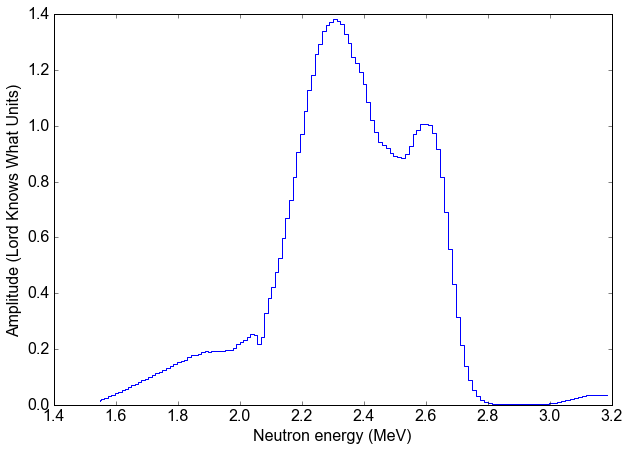

In [3]:
plt.plot(e_and, y_and, linestyle='steps')
plt.xlabel('Neutron energy (MeV)')
plt.ylabel('Amplitude (Lord Knows What Units)')

In [4]:
e_and_cal, y_and_cal = read_phs_data('./PTB_DATA/160729_email_andreas/det19-bi207-5cm.phs')

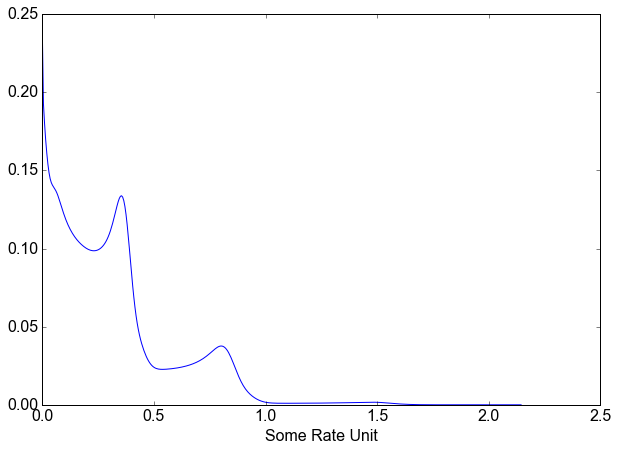

In [7]:
plt.plot(e_and_cal, y_and_cal)
plt.xlabel('Energy (MeVee)')
plt.xlabel('Some Rate Unit')

In [12]:
# Let's fit Andreas' end result with a double Gaussian
def double_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return a1*gaussian(x, mu1, sigma1) + a2*gaussian(x, mu2, sigma2)


In [22]:
from iminuit import Minuit

In [25]:
# Chi^2 function for single Gaussian function in neutron energy
class Chi2Func_doublegaussian:
    def __init__(self,x,y_data):
        self.x = x
        self.y_data = y_data

    def __call__(self,*arg):
        y_fit = double_gaussian(self.x, *arg)
        chi2 = sum((self.y_data - y_fit)**2)
        return chi2

In [39]:
# Select the data to fit
sel = (e_and > 2.1) & (e_and < 2.9)

# Initialize chi2 function
chi2 = Chi2Func_doublegaussian(e_and[sel], y_and[sel])

# Give guess parameters
my_args = dict(a1=0.34, mu1=2.3, sigma1=0.1, a2 = 0.1, mu2 = 2.6, sigma2 = 0.05,
               error_a1 = 1, error_mu1 = 1, error_sigma1 = 1,
               error_a2 = 1, error_mu2 = 1, error_sigma2 = 1,
               errordef=1)
# 0.35, 2.3, 0.1, 0.1, 2.6,0.05
# # Initialize minimizer and minimize
m_and = Minuit(chi2,forced_parameters=['a1','mu1','sigma1','a2','mu2','sigma2'], **my_args)
m_and.migrad();
print(m_and.values)

FCN = 0.05311966526290144 
 TOTAL NCALL = 180 
 NCALLS = 180 
 
 
 EDM = 6.350635391537116e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a1,0.48065,0.194176,0,0,,,
2,mu1,2.32416,0.0546813,0,0,,,
3,sigma1,0.138702,0.0674214,0,0,,,
4,a2,0.148779,0.155027,0,0,,,
5,mu2,2.61259,0.0559503,0,0,,,
6,sigma2,0.0687936,0.0532679,0,0,,,


{'mu1': 2.3241623008435175, 'sigma1': 0.1387021969074494, 'a2': 0.14877941265599115, 'sigma2': 0.06879361549258933, 'a1': 0.4806496481454353, 'mu2': 2.612591862307567}


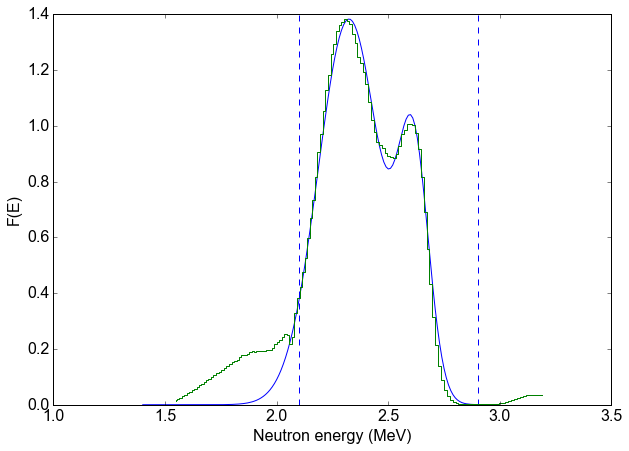

In [43]:
plt.plot(np.arange(1.4,3,0.01), double_gaussian(np.arange(1.4,3,0.01), **m_and.values))
plt.axvline(2.1, ls='--')
plt.axvline(2.9, ls='--')
plt.plot(e_and, y_and, linestyle='steps')
plt.xlabel('Neutron energy (MeV)')
plt.ylabel('F(E)')